In [3]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv("diabetes.csv")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'correlation between all variables')

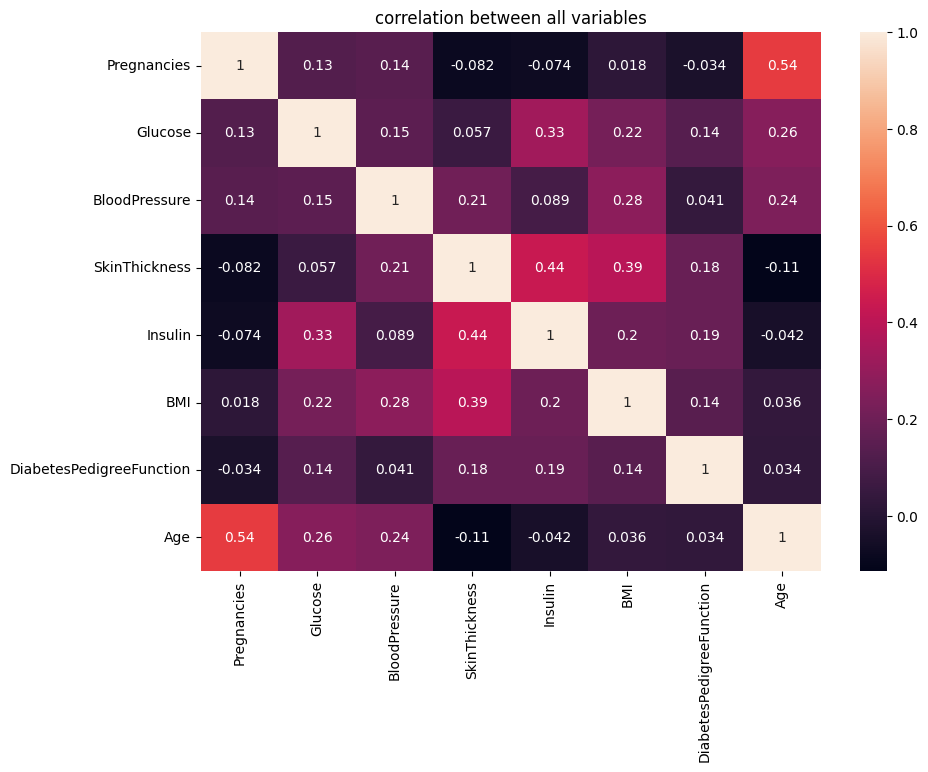

In [7]:
#correlation plot of independent variables
dataset1 = dataset.drop('Outcome',axis =1)
plt.figure(figsize =(10,7))
sns.heatmap(dataset1.corr(),annot=True)
plt.title("correlation between all variables")

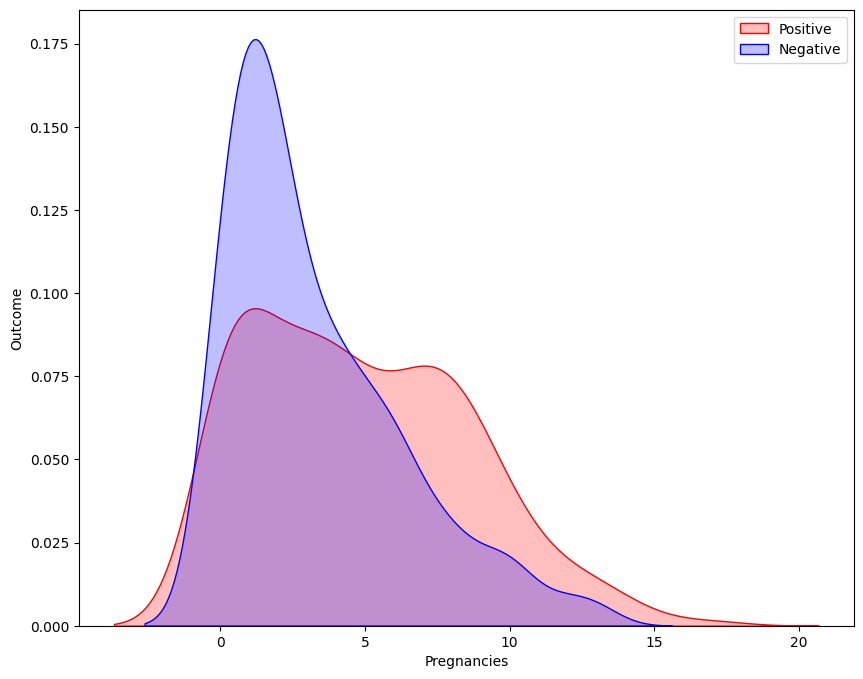

In [8]:
#Exploring Pregnancy and target variable
plt.figure(figsize=(10,8))
#plotting density function grap of the pregnancies and the target variables
kde = sns.kdeplot(dataset['Pregnancies'][dataset["Outcome"]==1],color = "Red",fill = True)
kde = sns.kdeplot(dataset['Pregnancies'][dataset["Outcome"]==0],color = "Blue",fill = True)
kde.set_xlabel("Pregnancies")
kde.set_ylabel("Outcome")
kde.legend(["Positive","Negative"])


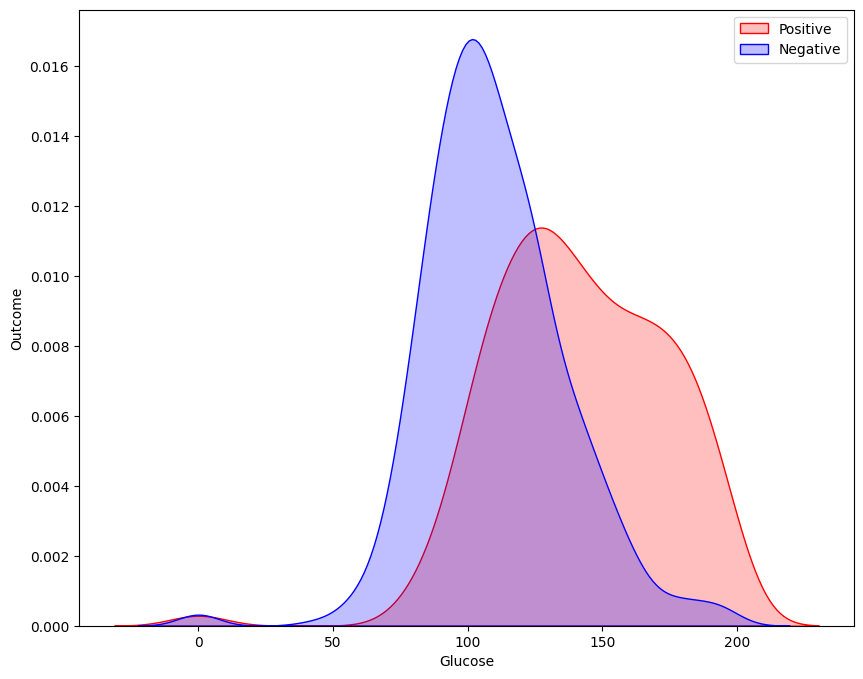

In [9]:
#Exploring Density and target variable
plt.figure(figsize=(10,8))
#plotting density function grap of the pregnancies and the target variables
kde = sns.kdeplot(dataset['Glucose'][dataset["Outcome"]==1],color = "Red",fill = True)
kde = sns.kdeplot(dataset['Glucose'][dataset["Outcome"]==0],color = "Blue",fill = True)
kde.set_xlabel("Glucose")
kde.set_ylabel("Outcome")
kde.legend(["Positive","Negative"])

In [10]:
# As 0 value do not mean anything in pratical terms so we are replacing them from mean and median values
#Glucose
dataset["Glucose"]= dataset["Glucose"].replace(0,dataset["Glucose"].median())
#Blood pressure
dataset["BloodPressure"]= dataset["BloodPressure"].replace(0,dataset["BloodPressure"].median())
#BMI
dataset["BMI"]= dataset["BMI"].replace(0,dataset["BMI"].mean())
#SkinThickness
dataset["SkinThickness"]= dataset["SkinThickness"].replace(0,dataset["SkinThickness"].mean())
#Insulin
dataset["Insulin"]= dataset["Insulin"].replace(0,dataset["Insulin"].mean())

In [11]:
#Splitting thedependent and independent variable
x = dataset.drop(["Outcome"],axis =1)
y = dataset["Outcome"]

In [14]:
#Splitting the dataset into train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state =42)


In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

In [17]:
training_accuracy =[]
test_accuracy =[]
for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #check accuracy 
    training_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

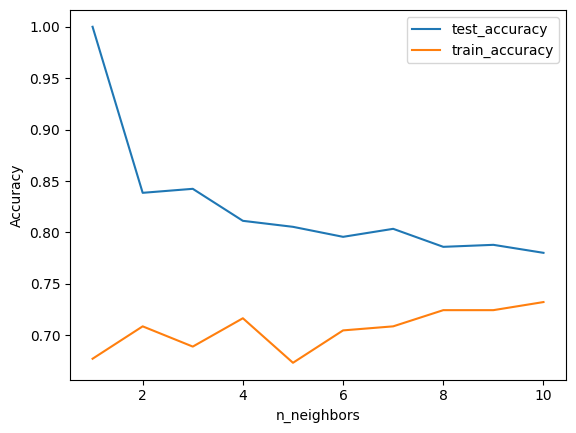

In [ ]:
plt.plot(range(1,11),training_accuracy,label = "test_accuracy")
plt.plot(range(1,11),test_accuracy ,label = "train_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
knn =KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train),":Training accuracy")
print(knn.score(x_test,y_test),":Test accuracy")

0.7879377431906615 :Training accuracy
0.7244094488188977 :Test accuracy


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0,max_depth=3)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),":Training accuracy")
print(dt.score(x_test,y_test),":Test accuracy")

0.77431906614786 :Training accuracy
0.6929133858267716 :Test accuracy


In [33]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 42)
mlp.fit(x_train,y_train)
print(mlp.score(x_train,y_train),":Training accuracy")
print(mlp.score(x_test,y_test),":Test accuracy")



0.7509727626459144 :Training accuracy
0.6811023622047244 :Test accuracy


In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [36]:
mlp1 = MLPClassifier(random_state = 42)
mlp1.fit(x_train_scaled,y_train)
print(mlp.score(x_train_scaled,y_train),":Training accuracy")
print(mlp.score(x_test_scaled,y_test),":Test accuracy")

0.6459143968871596 :Training accuracy
0.6614173228346457 :Test accuracy


c:\Users\kesha\OneDrive\Desktop\Projects\ml-from-scratch\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\kesha\OneDrive\Desktop\Projects\ml-from-scratch\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\kesha\OneDrive\Desktop\Projects\ml-from-scratch\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [37]:
# I think the best accuracy ome with decisio tree with max_depth = 6
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0,max_depth=6)
dt.fit(x_train,y_train)
print(dt.score(x_train,y_train),":Training accuracy")
print(dt.score(x_test,y_test),":Test accuracy")

0.857976653696498 :Training accuracy
0.7401574803149606 :Test accuracy
